Haremos la ejecución del código hecho en python en R (k-means/no supervisado) y regresión lineal, lasso, ridge, xboost, árboles de decisión (supervisado) para comparar con los resultados obtenidos en el otro lenguaje de programación. No iremos hacer el scraping ni la API en R (aunque se pudiera usar reticulate para usar beautiful soup y  httr paraa hacer HTTP requests en la API de Foursquare ) ni las transformaciones/limpieza de la BBDD como hicimos en python. Salvaremos la bbdd aunada y transformada en python para luego aplicar los modelos.

In [ ]:
install.packages('tidyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyr)

In [ ]:
library(base)

# Read the CSV file into a data frame
df <- read.csv("/content/listings.csv", header = TRUE, sep = ",")

head(df,3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>
1,6.528688e+17,Kleine Auszeit? Oder Business-Trip? Alles möglich!,21708794,Familie Sek,Tempelhof - Schöneberg,Lichtenrade,52.35765,13.39910,Entire home/apt,88,1,0,,NA,1,6,0,
2,2.708061e+07,Apartment with Living/Sleeping Room & own Kitchen,130216168,Tommy,Marzahn - Hellersdorf,Mahlsdorf,52.52006,13.65956,Entire home/apt,60,2,126,2022-09-11,2.54,2,163,18,
3,2.907769e+07,Wohnung im Grünen nah an der Metropole,219116245,Tilmann,Steglitz - Zehlendorf,Zehlendorf Südwest,52.41232,13.20715,Entire home/apt,36,8,29,2022-05-29,0.63,1,6,6,


In [ ]:
#instalo la librería para coger el cluster k-means
install.packages('cluster')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#aplico a listings 
# Load the library for clustering
library(cluster)

# Extract the latitude and longitude columns
y <- df[, c('latitude', 'longitude')]

# Run the KMeans algorithm to cluster the hotels
kmeans <- kmeans(y, 9)

# Add the cluster labels back to the original DataFrame
df$cluster <- kmeans$cluster



In [ ]:
install.packages('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ggplot2)

In [ ]:
# Calculo el promedio para cada cluster
cluster_prices <- aggregate(price ~ cluster, data = df, mean)
print(cluster_prices)

  cluster     price
1       1  74.35974
2       2 117.80837
3       3  87.67275
4       4 112.88412
5       5 105.03932
6       6  80.19926
7       7 107.83252
8       8 107.46154
9       9  84.51792


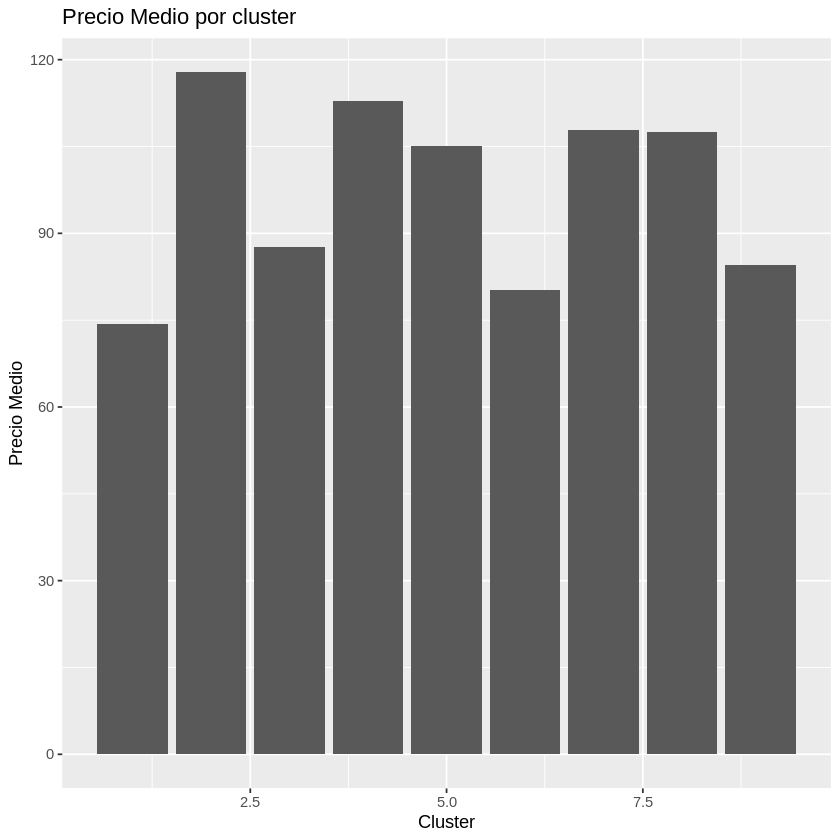

In [ ]:


#  grafico de barras de los precios medios por cluster
p <- ggplot(cluster_prices, aes(x = cluster, y = price)) +
  geom_col() +
  ggtitle("Precio Medio por cluster") +
  xlab("Cluster") +
  ylab("Precio Medio")

# plot
print(p)

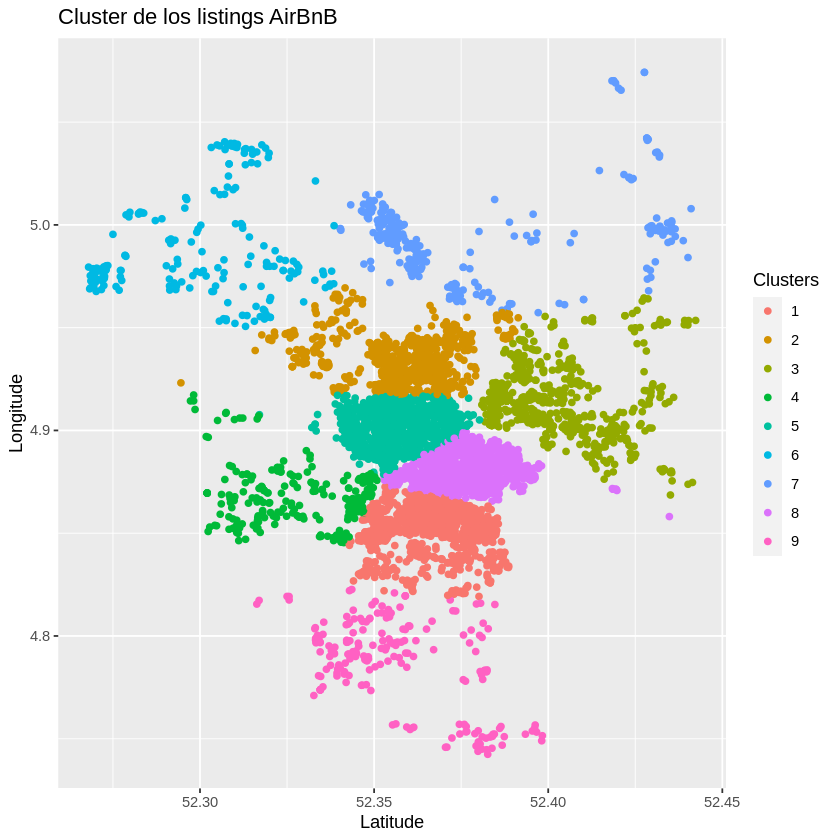

In [ ]:
# scatter plot de latitud y. longitud coloreado por cluster
p <- ggplot(df, aes(x = latitude, y = longitude, color = as.factor(cluster))) +
  geom_point() +
  ggtitle("Cluster de los listings AirBnB") +
  xlab("Latitude") +
  ylab("Longitude") +
  scale_color_discrete(name = "Clusters")

# plot
print(p)

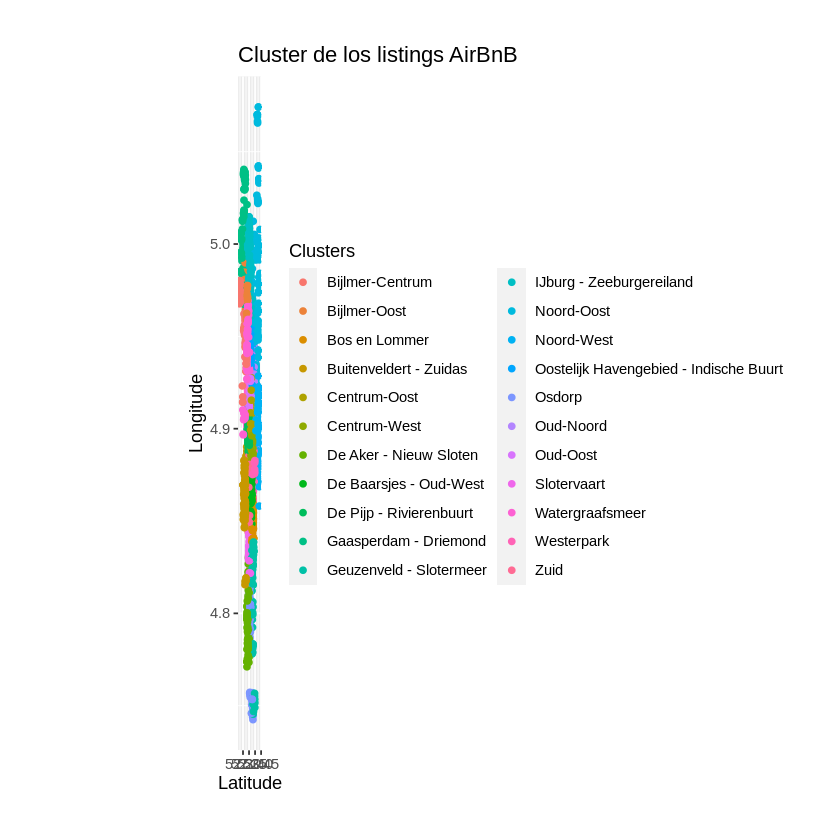

In [ ]:
# misma gráfica pero coloreada a partir de vecindario
p <- ggplot(df, aes(x = latitude, y = longitude, color = as.factor(neighbourhood))) +
  geom_point() +
  ggtitle("Cluster de los listings AirBnB") +
  xlab("Latitude") +
  ylab("Longitude") +
  scale_color_discrete(name = "Clusters") +
  theme(plot.margin = unit(c(1,1,1,4), "cm"))

# plot (no cabe bien pq utilizo r en colab y no en rstudio)
print(p)

In [ ]:
#elimino las variables que no utilizaré 
df$neighbourhood_group<-NULL

In [ ]:
df$id<-NULL

In [ ]:
df$host_id<-NULL

In [ ]:
df <- na.omit(df)

In [ ]:
#hago un análisis descriptivo de las variables, con valores mínimos y máximos, medianas, medias y cuartiles - para eliminar outliers 
summary(df)

     name            host_name         neighbourhood         latitude    
 Length:6247        Length:6247        Length:6247        Min.   :52.27  
 Class :character   Class :character   Class :character   1st Qu.:52.36  
 Mode  :character   Mode  :character   Mode  :character   Median :52.37  
                                                          Mean   :52.37  
                                                          3rd Qu.:52.38  
                                                          Max.   :52.44  
   longitude      room_type             price        minimum_nights    
 Min.   :4.742   Length:6247        Min.   :   0.0   Min.   :   1.000  
 1st Qu.:4.867   Class :character   1st Qu.: 122.0   1st Qu.:   2.000  
 Median :4.889   Mode  :character   Median : 177.0   Median :   3.000  
 Mean   :4.892                      Mean   : 213.5   Mean   :   5.111  
 3rd Qu.:4.911                      3rd Qu.: 252.0   3rd Qu.:   3.000  
 Max.   :5.074                      Max.   :7900.0

In [ ]:
head(df,5)

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,cluster
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<int>
1,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,49,3,305,2022-08-30,1.86,1,14,25,0363 5F3A 5684 6750 D14D,3
2,Studio with private bathroom in the centre 1,59484,Alexander,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.22,2,0,0,0363 CBB3 2C10 0C2A 1E29,1
3,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.38761,4.89188,Private room,136,2,231,2022-04-24,1.78,1,121,8,0363 974D 4986 7411 88D8,4
4,Comfortable double room,124245,Edwin,Centrum-West,52.36775,4.89092,Private room,75,2,428,2022-08-24,2.92,2,117,75,0363 607B EA74 0BD8 2F6F,4
5,Comfortable single room,124245,Edwin,Centrum-Oost,52.36584,4.89111,Private room,55,2,582,2022-08-29,4.16,2,160,86,0363 607B EA74 0BD8 2F6F,1


In [ ]:
#para poder eliminar los outliers solo quiero columnas numericas
data<-df

# las identifico
numeric_cols <- sapply(data, is.numeric)

# las selecciono
numeric_data <- data[, numeric_cols]

In [ ]:
#las standarizo
df_standardized <- scale(numeric_data)

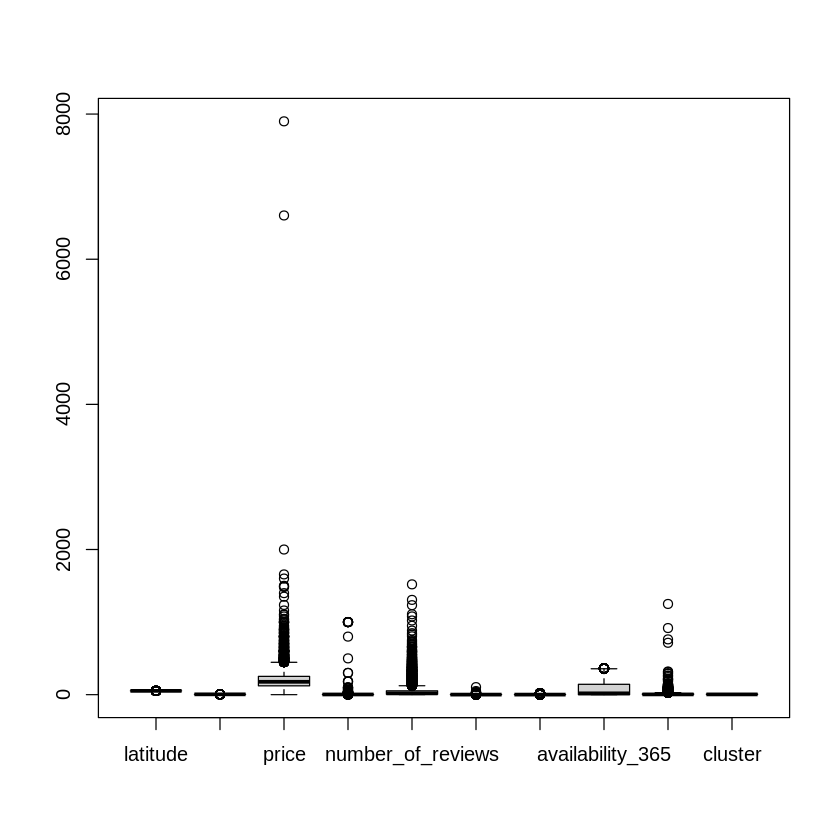

In [ ]:
# identifico los outliers (fuera del boxplot )
outliers <- boxplot(numeric_data)$out

# hay muchos, los elimino y creo el clean dataset
clean_data <- numeric_data[-which(apply(numeric_data, 1, function(x) {any(x %in% outliers)})), ]

In [ ]:
install.packages("fpc")
library(fpc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’




In [ ]:
# selecciono latitud y longitud 
lat_long <- df[, c("latitude", "longitude")]

# y pruebo diferentes ks (2 a 10) para ver cual es el numero optimo 
k_values <- c(2, 3, 4, 5, 6, 7, 8, 9, 10)
wcss <- c()
silhouette <- c()



In [ ]:
subset <- df[, c("latitude", "longitude")]

# creo un modelo k means pero no ha convergido
wisc.km <- kmeans(scale(subset), centers = 9, nstart = 20)

Warning message:
“did not converge in 10 iterations”


In [ ]:
cluster <- df$cluster

In [ ]:
#veo la tabla porque me sale mal
table(wisc.km$cluster, cluster)


   cluster
       1    2    3    4    5    6    7    8    9
  1    0    0   18    0    0    0    4    0  154
  2    0    2    0  266    0    0    6 1293    0
  3 1153    0  148   97    0    0   21    1    0
  4  208    0    9 1175   67    0    0    8    0
  5    0    0  548    0    0    3    0    0  160
  6    0    0    0    0    2   92    0    0    0
  7    5    5    0    0    0    0  175    6    0
  8    0  178    0    0    0    0    0    2    0
  9    0    0   26    3  404    8    0    0    0

In [ ]:
# comparo los clusters a una tabla de diagnóstico
diagnosis_prediction <- table(wisc.km$cluster, cluster)

# calculo el porcentaje de predicciones correctas
accuracy <- sum(diag(diagnosis_prediction)) / sum(diagnosis_prediction)

# y hago print de la acccuracy 
print(accuracy)

[1] 0.2551625


In [ ]:
install.packages('stats')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”


In [ ]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
print(length(df$label))

[1] 0


In [ ]:
head(df,1)

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,cluster
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<int>
1,Quiet Garden View Room & Super Fast WiFi,Daniel,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,49,3,305,2022-08-30,1.86,1,14,25,0363 5F3A 5684 6750 D14D,3


In [ ]:
#elijo las columnas 4 y 5 (latitud y longitud)
customer_prep = df[4:5]

In [ ]:
#escalo 
customer_prep = scale(customer_prep)
customer_prep %>% head()

,latitude,longitude
1,-0.08449214,1.22154898
2,-0.09725374,0.03452783
3,0.97563206,-0.01448311
4,0.07047012,-0.03743458
5,-0.01658221,-0.03289210
6,0.24958827,0.53133145


In [ ]:

install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘htmltools’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’




In [ ]:
# pongo seed 
set.seed(50)

# quiero ver el k optimo 
km = kmeans(x = customer_prep, centers = 9)
km

K-means clustering with 9 clusters of sizes 710, 1481, 180, 340, 249, 1262, 475, 150, 1400

Cluster means:
     latitude  longitude
1 -0.08678317  0.9268256
2  0.11585390 -0.8076356
3 -0.39712474 -2.5552806
4 -1.33238285 -0.8149136
5 -0.89568378  2.0054561
6 -0.53062057  0.1332808
7  2.00970350  0.8900377
8 -3.11996492  2.2732692
9  0.58613075 -0.1115957

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   1    6    9    9    6    1    9    9    6    6    1    9    9    6    4    2 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   6    1    2    9    9    2    6    2    9    6    9    9    2    9    2    1 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   9    6    2    2    6    6    2    9    9    6    9    1    6    1    6    6 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   9    6    6    2    6    5    2    9    6    2    6  

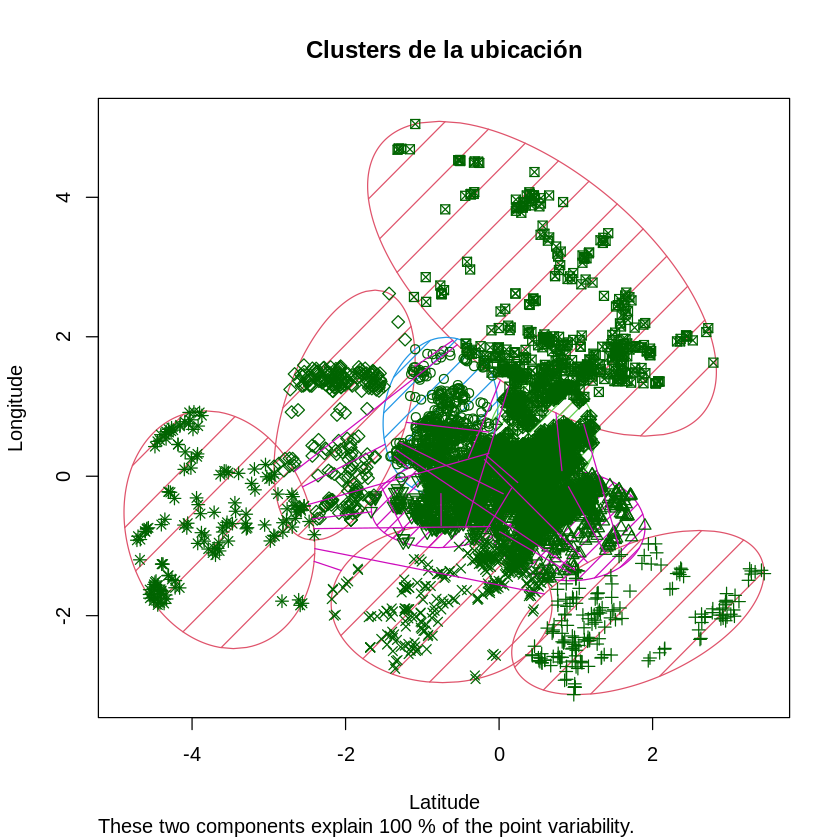

In [ ]:
# vector de numeros enteros que pertenencen a cada cluster
k_means = km$cluster

# uso cluspot para ver los clusters 
clusplot(customer_prep, k_means, shade = TRUE, color = TRUE, span = TRUE,
         main = paste('Clusters de la ubicación'), 
         xlab = 'Latitude',
         ylab = 'Longitude')

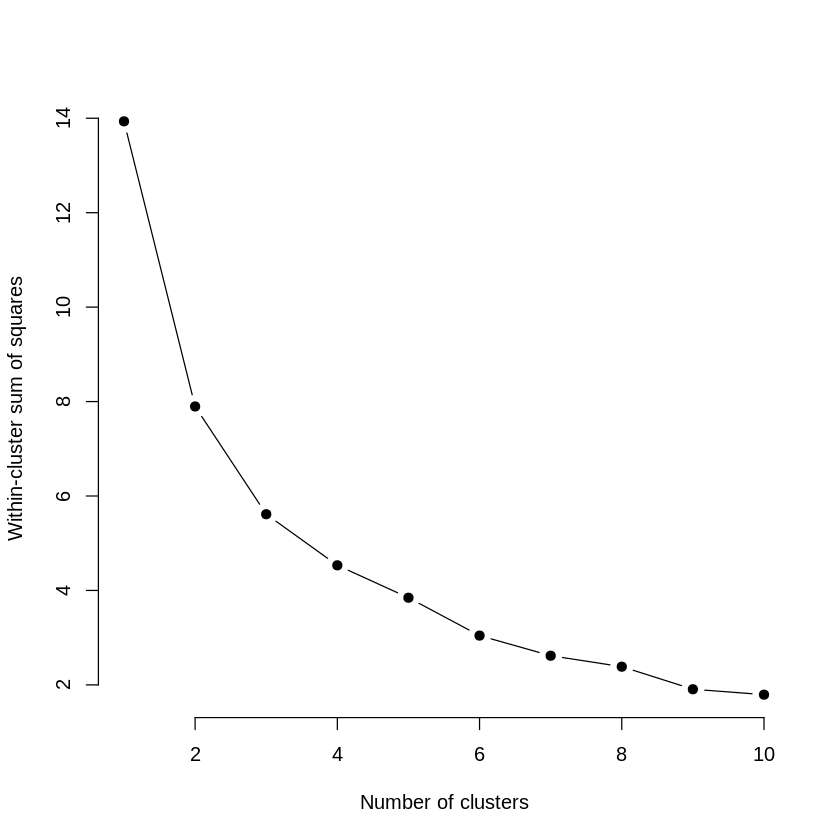

In [ ]:
data <- df[, c("latitude", "longitude")]
# ahora hago fit entre 1 y 10 para ver k optimo
wcss <- vector()
for (i in 1:10) {
  kmeans_model <- kmeans(data, centers = i)
  wcss[i] <- kmeans_model$tot.withinss
}

# y hago plot del wcss vs numeros de k (gráfico de codos, donde vemos que 2 es ideal)
plot(1:10, wcss, type = "b", pch = 19, frame = FALSE, 
     xlab = "Number of clusters",
     ylab = "Within-cluster sum of squares")

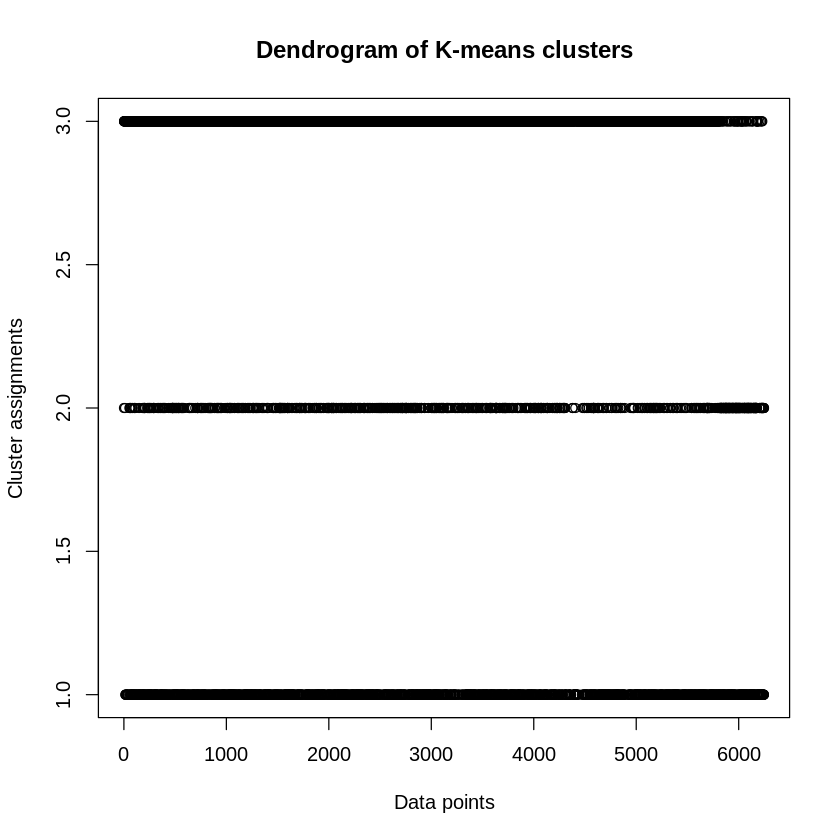

In [ ]:
#el dendograma no me funciona en este dataset 

library(cluster)
library(factoextra)

data <- df[, c("latitude", "longitude")]

# Fit the K-means model
kmeans_model <- kmeans(data, centers = 3)

# Create the dendrogram
plot(kmeans_model$cluster, main = "Dendrogram of K-means clusters",
     xlab = "Data points", ylab = "Cluster assignments")

In [ ]:
#ahora vamos aplicar un dbscan
# seleccionamos latitud y longitud
data <- df[, c("latitude", "longitude")]

# hacemos fit en el dbscan
db <- dbscan(data, eps = 0.1, MinPts = 5)

# predecimos los cluster
pred <- predict(db, data)

# y lo añadimos a los datos 
data$predicted_cluster <- pred



In [ ]:
true_cluster <- as.factor(data$predicted_cluster)
pred_cluster <- as.factor(db$cluster)
accuracy <- sum(true_cluster == pred_cluster) / length(true_cluster)
cat("Accuracy:", accuracy)

#vemos que tenemos un accuracy del 100% lo que indica que hemos hecho algo mal 

Accuracy: 1

In [ ]:
#la matriz de confusión tiene solo una clase (1)
conf_matrix <- table(true_cluster, pred_cluster)
conf_matrix


            pred_cluster
true_cluster    1
           1 6247

In [ ]:
head(df,1)

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,cluster
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<int>
1,Quiet Garden View Room & Super Fast WiFi,Daniel,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,49,3,305,2022-08-30,1.86,1,14,25,0363 5F3A 5684 6750 D14D,3


In [ ]:
#sin embargo no vamos utilizar dbscan por lo que seguimos con la transformación de datos para la regresión 

# voy cargar los datos ya transformados en python
df <- read.csv("/content/datosdeusohotellisting.csv", header = TRUE, sep = ",")
#y empiezo a transformar las categóricas en factores para la regresión 
df$room_type<-as.factor(df$room_type)

In [ ]:
df$neighbourhood <- as.factor(df$neighbourhood)

In [ ]:
# Creo la formula y defino las variables de uso
#no son exactamente las mismas que en python porque el modelo no las cogía - como neighbourhood aún transformando en factor
formula <- as.formula(price ~ latitude + longitude + room_type + minimum_nights + number_of_reviews + calculated_host_listings_count)

# hago fit en el modelo de regresión
regression_model <- lm(formula, df)

# y print en su resumen donde tenemos 4,56% de R**2
summary(regression_model)


Call:
lm(formula = formula, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-233.9  -83.4  -33.8   40.6 7666.6 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     676.82993 5632.44585   0.120   0.9044    
latitude                          3.70419  107.03278   0.035   0.9724    
longitude                      -131.56438   56.16766  -2.342   0.0192 *  
room_typeHotel room             -39.67348   23.80100  -1.667   0.0956 .  
room_typePrivate room           -71.23919    5.88263 -12.110  < 2e-16 ***
room_typeShared room           -160.47926   31.46443  -5.100 3.49e-07 ***
minimum_nights                    0.01926    0.05790   0.333   0.7395    
number_of_reviews                -0.12610    0.02545  -4.955 7.41e-07 ***
calculated_host_listings_count    7.50009    0.93493   8.022 1.23e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 184.8 on 6238 degrees of fre

In [ ]:
install.packages("glmnet")

# Load the glmnet package
library(glmnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘shape’


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-6



In [ ]:
head(df,1)

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,cluster
,<chr>,<chr>,<fct>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<int>
1,Quiet Garden View Room & Super Fast WiFi,Daniel,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,49,3,305,2022-08-30,1.86,1,14,25,0363 5F3A 5684 6750 D14D,3


In [ ]:
# instalo la librería xboost
install.packages("xgboost")

# y. lo cargo 
library(xgboost)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#pongo seed 0 
set.seed(0)

#separo entre training (80%) y test (20%)
parts = createDataPartition(df$price, p = .8, list = F) 
train = df[parts, ]
test = df[-parts, ]

#defino predictores y la variable target (price)
train_x = data.matrix(train[, c('latitude', 'longitude', 'minimum_nights',
 'number_of_reviews', 'calculated_host_listings_count')])
train_y = train[, 'price']

#y las mismas en test
test_x = data.matrix(test[, c('latitude', 'longitude', 'minimum_nights',
 'number_of_reviews', 'calculated_host_listings_count')])
test_y = test[, 'price']

#defino los modelos finales en training y test 
xgb_train = xgb.DMatrix(data = train_x, label = train_y)
xgb_test = xgb.DMatrix(data = test_x, label = test_y)

In [ ]:
#hago una watchlist para ver los cambios
watchlist = list(train=xgb_train, test=xgb_test)

#hago fit y piedo que enseñe cambios en 70 rounds en el rmse 
model = xgb.train(data = xgb_train, max.depth = 3, watchlist=watchlist, nrounds = 70)

[1]	train-rmse:247.976814	test-rmse:194.925734 
[2]	train-rmse:221.810726	test-rmse:162.059981 
[3]	train-rmse:207.144957	test-rmse:142.751289 
[4]	train-rmse:199.478979	test-rmse:132.544701 
[5]	train-rmse:195.309074	test-rmse:126.936581 
[6]	train-rmse:192.654242	test-rmse:125.059750 
[7]	train-rmse:185.638805	test-rmse:123.783562 
[8]	train-rmse:184.582584	test-rmse:122.798756 
[9]	train-rmse:183.638827	test-rmse:122.175948 
[10]	train-rmse:183.160736	test-rmse:122.008683 
[11]	train-rmse:175.603897	test-rmse:121.995014 
[12]	train-rmse:175.180519	test-rmse:121.773519 
[13]	train-rmse:174.806213	test-rmse:121.240807 
[14]	train-rmse:174.435921	test-rmse:121.141611 
[15]	train-rmse:174.142898	test-rmse:120.782982 
[16]	train-rmse:173.929830	test-rmse:120.677251 
[17]	train-rmse:173.345566	test-rmse:120.662630 
[18]	train-rmse:173.056767	test-rmse:120.642092 
[19]	train-rmse:169.555344	test-rmse:120.487736 
[20]	train-rmse:169.369276	test-rmse:120.195888 
[21]	train-rmse:169.198140	te

In [ ]:
#fit 
xgb_model = xgb.train(params = list(objective = "reg:squarederror"),
                    data = xgb_train, nrounds = 10)


[1] "latitude"                       "longitude"                     
[3] "minimum_nights"                 "number_of_reviews"             
[5] "calculated_host_listings_count"

NULL

In [ ]:
#pido resumen del xgb_model
summary(xgb_model)

              Length Class              Mode       
handle            1  xgb.Booster.handle externalptr
raw           47259  -none-             raw        
niter             1  -none-             numeric    
call              4  -none-             call       
params            2  -none-             list       
callbacks         1  -none-             list       
feature_names     5  -none-             character  
nfeatures         1  -none-             numeric    

In [ ]:
#vemos la importancia de caada feature en el modelo 

xgb.importance(model = xgb_model)

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
latitude,0.57602811,0.23718984,0.29962547
longitude,0.22431162,0.31600619,0.34269663
number_of_reviews,0.13457833,0.24798788,0.16104869
calculated_host_listings_count,0.04215180,0.11479425,0.09550562
minimum_nights,0.02293015,0.08402184,0.10112360


In [ ]:
#Ahora haré una regresión con ridge
#defino mis variables predictoras
x <- data.matrix(df[, c('latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count')])

In [ ]:
#y la dependiente 
y<- df$price

In [ ]:
library(glmnet)

#hago el modelo para ridge (si alpha=1 sería Lasso)
model <- glmnet(x, y, alpha = 0)

#veo resumen del modelo 
summary(model)

          Length Class     Mode   
a0        100    -none-    numeric
beta      500    dgCMatrix S4     
df        100    -none-    numeric
dim         2    -none-    numeric
lambda    100    -none-    numeric
dev.ratio 100    -none-    numeric
nulldev     1    -none-    numeric
npasses     1    -none-    numeric
jerr        1    -none-    numeric
offset      1    -none-    logical
call        4    -none-    call   
nobs        1    -none-    numeric

[1] 4.754176

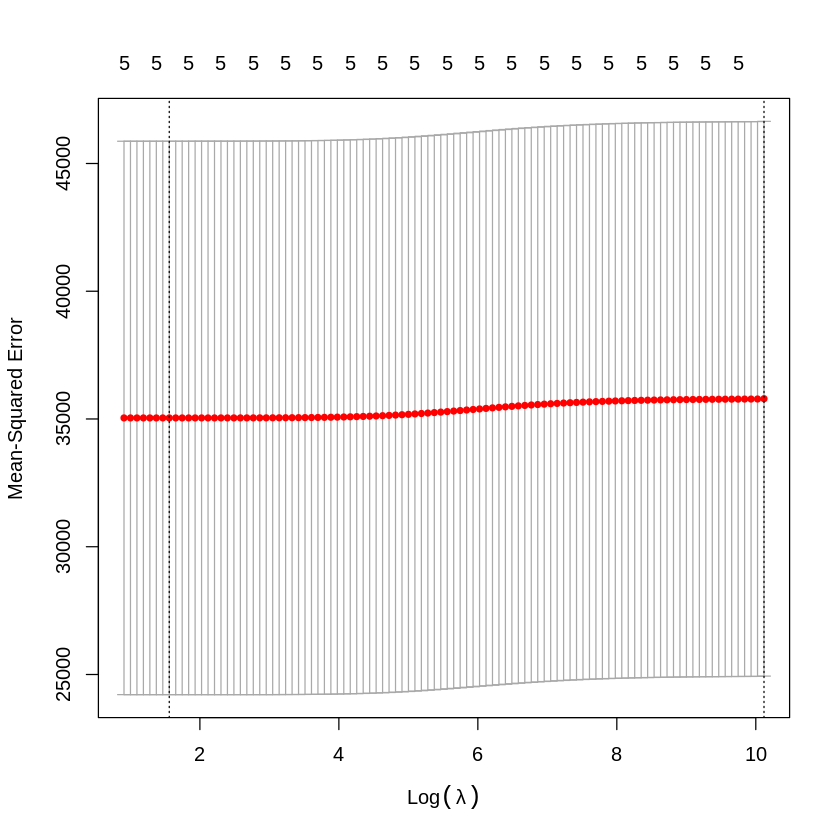

In [ ]:
#hago cross validation para ver el valor optimo de lambda
cv_model <- cv.glmnet(x, y, alpha = 0)

#y el mejor lamnda que minimiza MSE
best_lambda <- cv_model$lambda.min
best_lambda


#hacemos el plot 
plot(cv_model) 

In [ ]:
#buscamos los coeficientes de los mejores modelos 
best_model <- glmnet(x, y, alpha = 0, lambda = best_lambda)
coef(best_model)

6 x 1 sparse Matrix of class "dgCMatrix"
                                          s0
(Intercept)                    1365.55219449
latitude                         -6.69432551
longitude                      -162.70629982
minimum_nights                    0.03836778
number_of_reviews                -0.24499379
calculated_host_listings_count    4.03493692

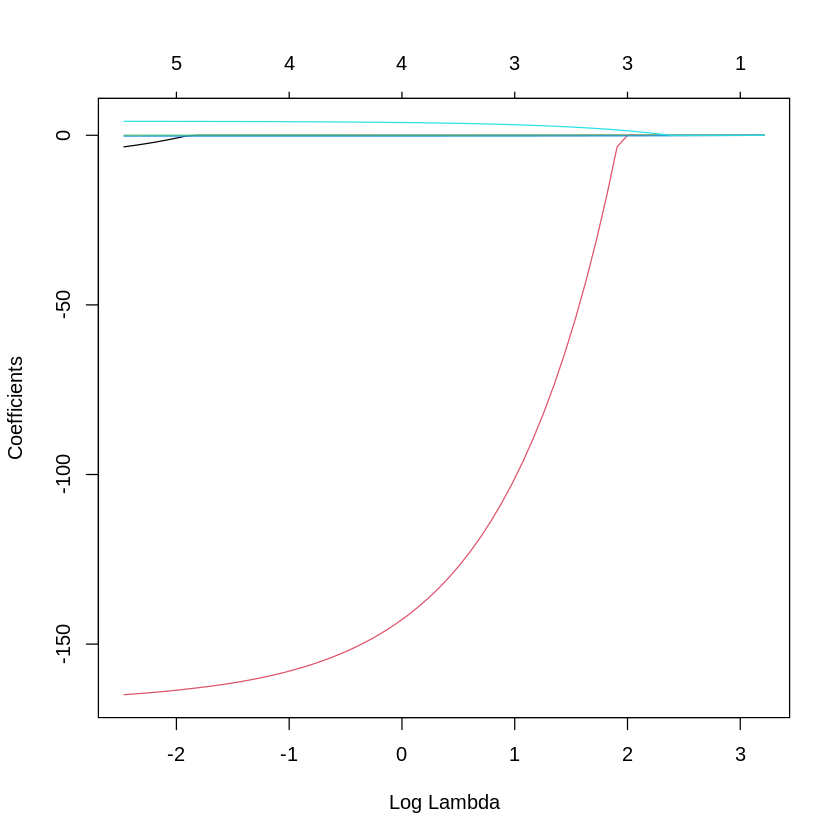

In [ ]:
#y los reproducimos donde vemos que 3 minimizaría los coefientes 
plot(model, xvar = "lambda")

In [ ]:
#utilizamos los datos del fit 
y_predicted <- predict(model, s = best_lambda, newx = x)

#buscamos los errores 
sst <- sum((y - mean(y))^2)
sse <- sum((y_predicted - y)^2)

# y el r**2 - vemos que es de un 2%
rsq <- 1 - sse/sst
rsq

[1] 0.02007628

In [ ]:
library(glmnet)

#ahora haremos fit con lasso
model <- glmnet(x, y, alpha = 1)

#vemos el resumen del modelo 
summary(model)

          Length Class     Mode   
a0         62    -none-    numeric
beta      310    dgCMatrix S4     
df         62    -none-    numeric
dim         2    -none-    numeric
lambda     62    -none-    numeric
dev.ratio  62    -none-    numeric
nulldev     1    -none-    numeric
npasses     1    -none-    numeric
jerr        1    -none-    numeric
offset      1    -none-    logical
call        4    -none-    call   
nobs        1    -none-    numeric

[1] 1.262751

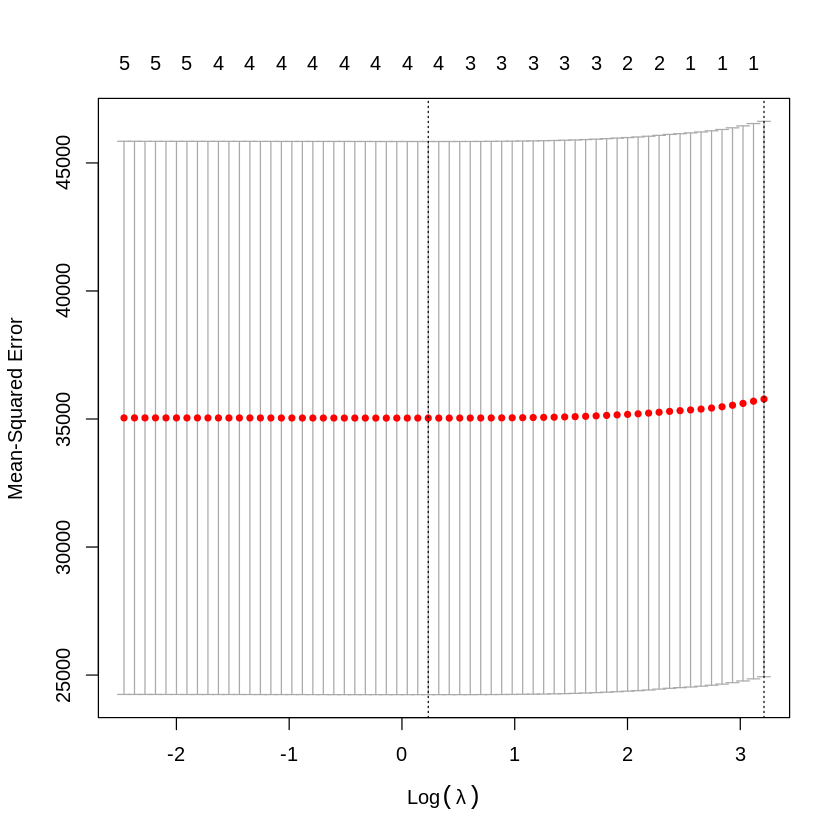

In [ ]:
#hacemos cross validation 
cv_model <- cv.glmnet(x, y, alpha = 1)

#buscamos el lambda optimo que minimiza errores
best_lambda <- cv_model$lambda.min
best_lambda


#y hacemos el plot 
plot(cv_model) 

In [ ]:
#buscamos coeficientes de los mejores modelos 
best_model <- glmnet(x, y, alpha = 1, lambda = best_lambda)
coef(best_model)

6 x 1 sparse Matrix of class "dgCMatrix"
                                          s0
(Intercept)                     8.870995e+02
latitude                        .           
longitude                      -1.364618e+02
minimum_nights                  8.836467e-03
number_of_reviews              -2.383100e-01
calculated_host_listings_count  3.660994e+00

In [ ]:
#hacemos fit para predecir
y_predicted <- predict(best_model, s = best_lambda, newx = x)

#buscamos errores 
sst <- sum((y - mean(y))^2)
sse <- sum((y_predicted - y)^2)

#y el r**2 que vemos que no mejora mucho en relación a Ridge (2,1%)
rsq <- 1 - sse/sst
rsq

[1] 0.02192259

He recopilado datos de listados de AirBnB de la ciudad de Berlín para realizar una clasificación mediante regresión y así determinar los niveles de precios en función del tipo de alojamiento y la cantidad de habitaciones que tienen listados (si son ofertas individuales, de hoteles o inmobiliarias/grupos de inversión). Utilizaremos el método anova para clasificar los precios. Este árbol de decisión no se ha hecho en python. 

In [ ]:
# cargando la bbdd 

df<- read.csv2("/content/listings.csv", sep=",")

In [ ]:
install.packages('rpart')
library(rpart) 
install.packages('rpart.plot') 
library(rpart.plot) 
install.packages('rattle') 
library(rattle) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘XML’


Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



In [ ]:
#hago el árbol de decisión con precio como target, y tipo de habitación y numero/tipo de habitaciones listadas como predictores.
library(rpart)

decision_tree <- rpart(formula = price ~ room_type + calculated_host_listings_count, data = df, method = "anova")

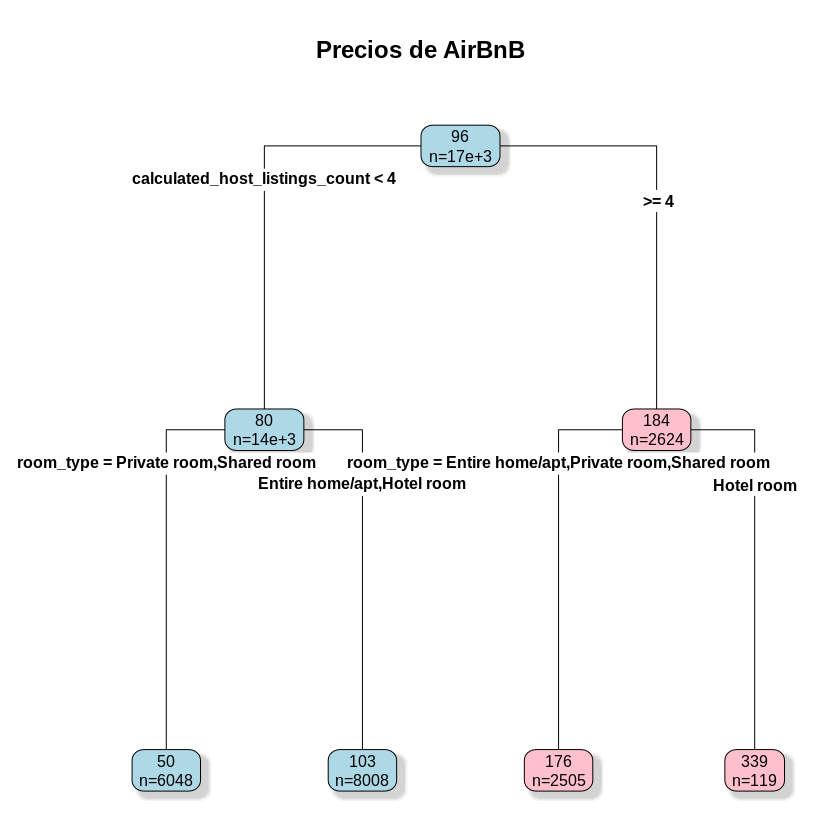

In [ ]:
#grafico el árbol
rpart.plot(decision_tree, type = 4, extra = 1, cex = 0.8, box.palette = c("light blue","pink"), shadow.col = "lightgrey", main = "Precios de AirBnB")

Podemos ver que hay dos caminos para predecir los precios: el más relevante es si la habitación/piso proviene de anunciantes con 4 o más inmuebles listados (esto generalmente está relacionado con grupos de inversión o inmobiliarias profesionales y no alquiler turístico privado) o si hay menos de 4 habitaciones/pisos listados.
Luego el modelo clasifica por tipo de habitación (privada, compartida y casa entera en el el segundo leaf a la izquierda) y si es entera/privada/compartida y habitación de hotel en el segundo leaf a la derecha. Vemos que los precios dependen de estas variables, y, los que son entire home/Hotel room suelen ser más caros (es esperado que valgan más que una habitación en piso compartido o habitación compartida). Sin embargo vemos que en ambas categorías de tipos de habitación, el hecho de que provengan de habitaciones/pisos con igual o más que 4 listados en AirBnB más que triplica en precio los que son de anunciantes individuales.